# 1. EXPLORATORY ANALYSIS
---

In [106]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scp
from scipy import stats

---
# Table of contents
1. [Description of the dataset](#intro)
    1. [ Variable types](#intro2)
    2. [ Variable description ](#intro3)
2. [Variable representation](#ci)
    1. [Plots of continuous variables](#ci3)
    2. [Plots of discrete variables](#ci4)
    3. [Identification of outliers](#ci5)
---

## 1.1 Description of the dataset <a name="intro"></a>
---
+ Variable types (qualitative, discrete, continuous...)
+ Variable description (df.describe())

In [76]:
data = pd.read_csv('data/insurance.csv', sep=",", header=0)
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In our data frame we have 7 variables:
+ 2 'int64': age, children
+ 3 'object': sex, smoker, region
+ 2 'float64': loads, bmi


    + 'int64' we mean numeric characters, and the 64 refers to the memory used to store the character.


    + 'object' we mean a kind of tag or alias to refer to the object.
    We transform variables of type 'object' to categorical in the next step.


    + 'floats' we mean variables with real positive or negative numbers, that is, with decimals.

### Variable types <a name="intro2"></a>
---
Regarding the types of variables we have:
+ Age: discrete quantitative
+ Sex: dichotomous qualitative
+ Bmi: continuous quantitative
+ Children: discrete quantitative
+ Smoker: dichotomous qualitative
+ Region: qualitative categorical
+ Charges: continuous quantitative

In [78]:
data_objects = data.columns[data.dtypes == 'object'] #Saco todos los nombres de las columnas
data[data_objects] = data[data_objects].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


### Variable description <a name="intro3"></a>

In [79]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Missing data

In [110]:
print("Are there values NaN?:\n",data.isnull().values.any())
print("Attributes values NaN :\n",data.isnull().sum())
print("Total number of NaN:\n",data.isnull().sum().sum())

Are there values NaN?:
 False
Attributes values NaN :
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Total number of NaN:
 0


## 1.2 VARIABLE REPRESENTATION <a name="ci"></a>

### Plots of continuous variables <a name="ci3"></a>

### AGE:
+ Age of the insurace's primary beneficiary
---

+ `Histogram`:


<AxesSubplot:xlabel='age', ylabel='Count'>

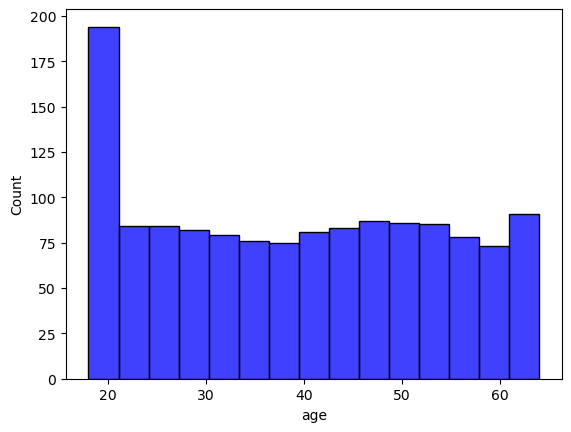

In [80]:
sns.histplot(data = data, x = 'age', bins=15, color = "blue")

   + `BoxPlot`:


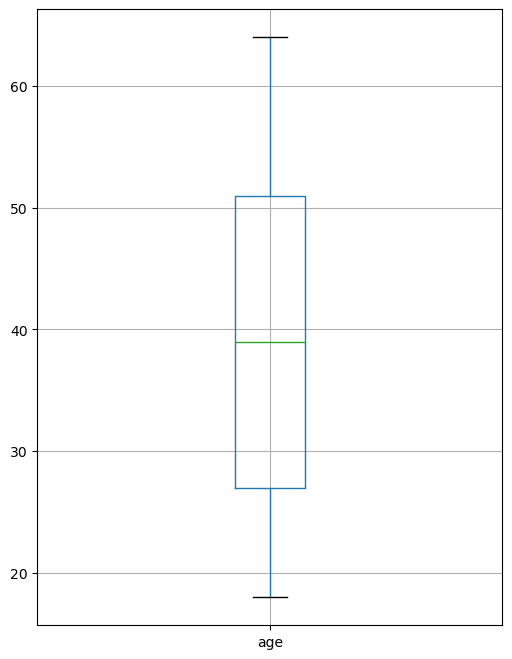

In [81]:
getPlot = data.boxplot(column='age', figsize=(6, 8))

   + `Violinplot`:

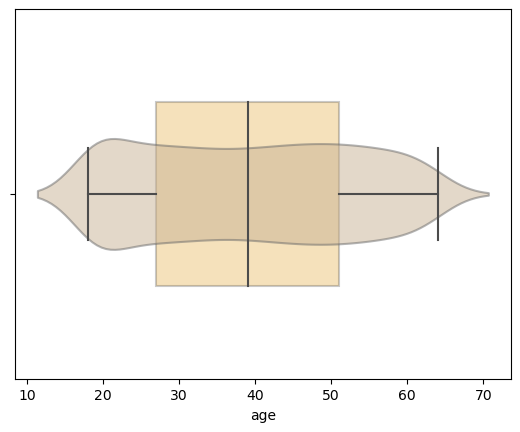

In [107]:
ax = sns.boxplot(x = 'age', data=data, width=0.5, color="orange", boxprops=dict(alpha=.3))
ax = sns.violinplot(x = 'age', data=data, width=0.3, color = "tan", inner=None)
for violin, alpha in zip(ax.collections[::2], [0.5]):
    violin.set_alpha(alpha)

### BMI
+ Body Mass Index, defined as the body mass divided by the square of the body height, and expressed in units of kg/m2.
---

+ `Histogram`:

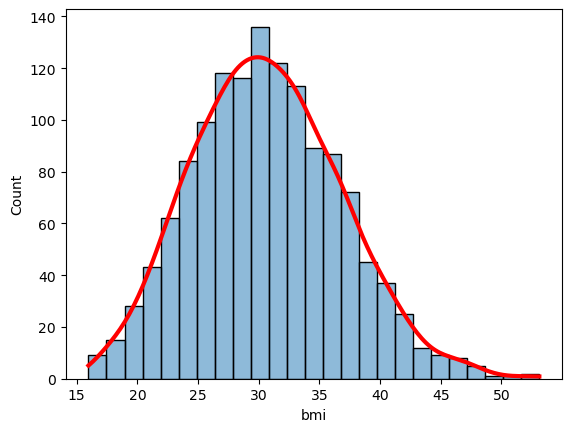

In [82]:
dens_plot_weight = sns.histplot(data = data, x = 'bmi', kde=True)
dens_plot_weight.lines[0].set_color('red')
dens_plot_weight.lines[0].set_linewidth(3)

   + `BoxPlot`:

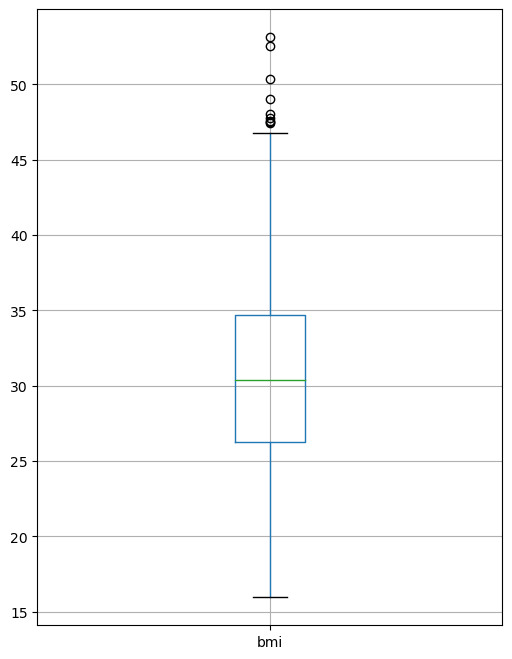

In [83]:
getPlot = data.boxplot(column='bmi', figsize=(6, 8))

   + `Violinplot`:

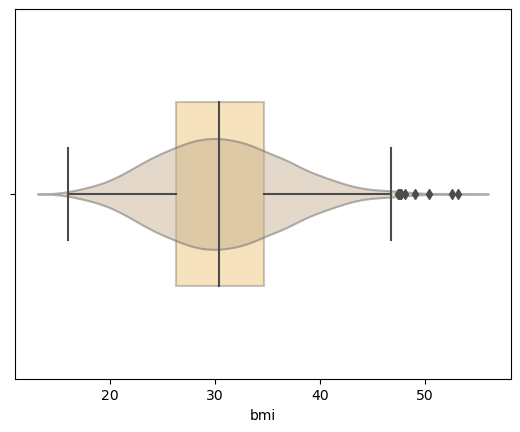

In [108]:
ax = sns.boxplot(x = 'bmi', data=data, width=0.5, color="orange", boxprops=dict(alpha=.3))
ax = sns.violinplot(x = 'bmi', data=data, width=0.3, color = "tan", inner=None)
for violin, alpha in zip(ax.collections[::2], [0.5]):
    violin.set_alpha(alpha)

### CHILDREN
+ Number of children covered by health insurance / Number of dependents
---

+ `Histogram`:

<AxesSubplot:xlabel='children', ylabel='Count'>

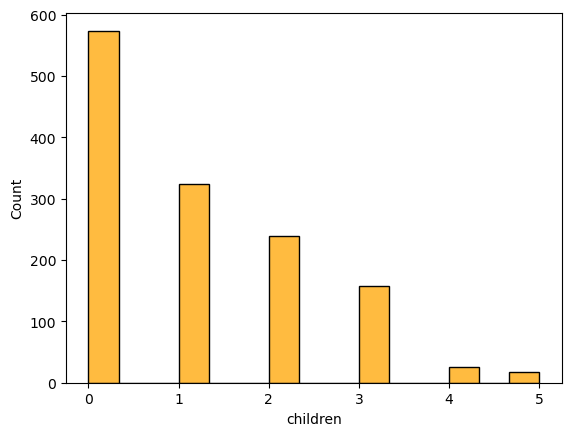

In [84]:
sns.histplot(data = data, x = 'children', bins=15, color = "orange")

   + `BoxPlot`:

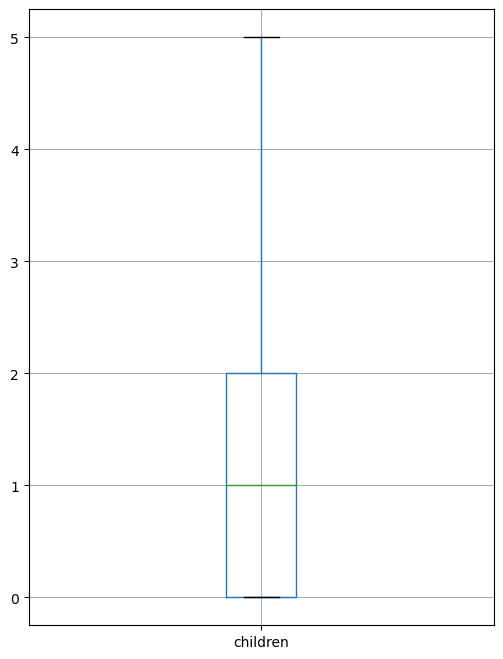

In [85]:
getPlot = data.boxplot(column='children', figsize=(6, 8))

   + `Violinplot`:

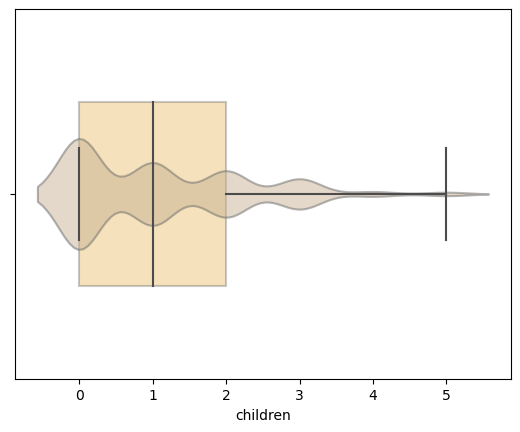

In [111]:
ax = sns.boxplot(x = 'children', data=data, width=0.5, color="orange", boxprops=dict(alpha=.3))
ax = sns.violinplot(x = 'children', data=data, width=0.3, color = "tan", inner=None)
for violin, alpha in zip(ax.collections[::2], [0.5]):
    violin.set_alpha(alpha)

### CHARGES
+ Individual medical costs billed by health insurance
---

+ `Histogram`:

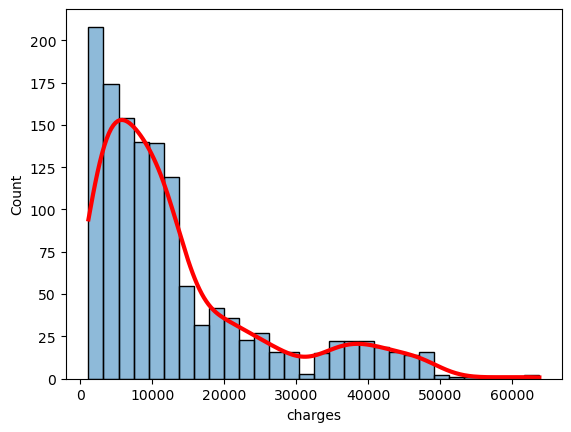

In [86]:
dens_plot_weight = sns.histplot(data = data, x = 'charges', kde=True)
dens_plot_weight.lines[0].set_color('red')
dens_plot_weight.lines[0].set_linewidth(3)

   + `BoxPlot`:

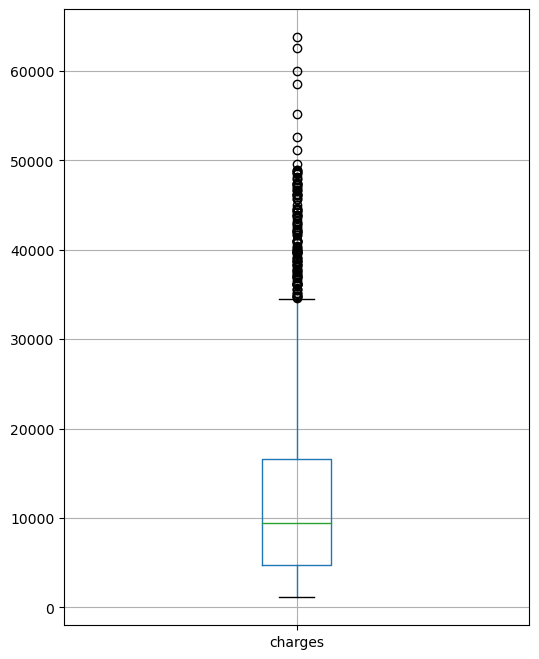

In [87]:
getPlot = data.boxplot(column='charges', figsize=(6, 8))

   + `Violinplot`:

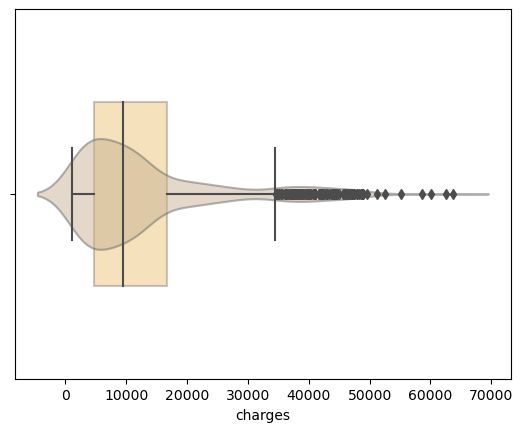

In [109]:
ax = sns.boxplot(x = 'charges', data=data, width=0.5, color="orange", boxprops=dict(alpha=.3))
ax = sns.violinplot(x = 'charges', data=data, width=0.3, color = "tan", inner=None)
for violin, alpha in zip(ax.collections[::2], [0.5]):
    violin.set_alpha(alpha)

  ## Plot of discrete variables : <a name="ci4"></a>
  ---
  - For factors :  
    - Frecuency tables (absolute and relative).  
    - Grafics (bar plot).  

    


  - We have 3 dicrete variables in this dataset: **sex**, **region** and **smoker**.

## Frecuency tables: 
---

### SEX
+ Insurace's primary beneficiary gender (female or male)

In [88]:
data['sex'].unique() #Tenemos dos tipos de genero

['female', 'male']
Categories (2, object): ['female', 'male']

The `sex` variable can take two values: 'female' and 'male'

In [89]:
AbsFreq_Sex = data['sex'].value_counts().sort_index()
AbsFreq_Sex

female    662
male      676
Name: sex, dtype: int64

There are 662 `female` and 676 `male`.

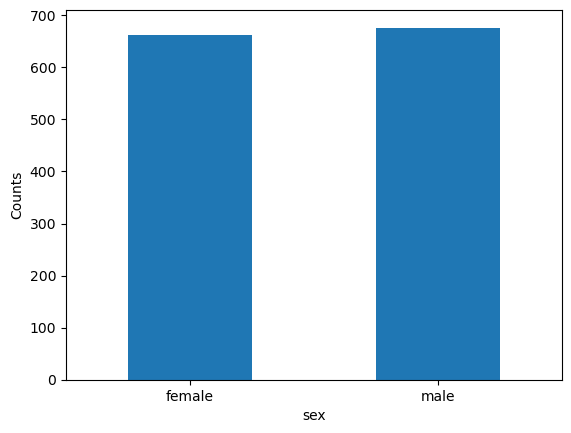

In [90]:
plot = AbsFreq_Sex.plot.bar(rot=0, xlabel='sex', ylabel ='Counts')

In [91]:
RelFreq_Sex = data['sex'].value_counts(normalize=True).sort_index()
RelFreq_Sex

female    0.494768
male      0.505232
Name: sex, dtype: float64

---
### SMOKER
+ Whether the primary beneficiary is a current smoker or not

In [92]:
data['smoker'].unique()

['yes', 'no']
Categories (2, object): ['no', 'yes']

The `smoker` variable can take two values: 'yes' and 'no'

In [93]:
AbsFreq_Smoker = data['smoker'].value_counts().sort_index()
AbsFreq_Smoker

no     1064
yes     274
Name: smoker, dtype: int64

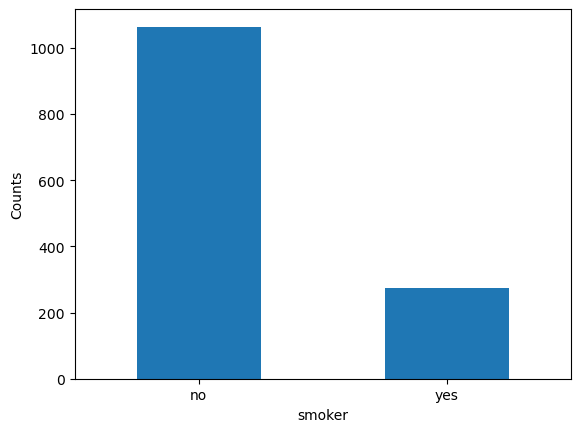

In [94]:
plot = AbsFreq_Smoker.plot.bar(rot=0, xlabel='smoker', ylabel ='Counts')

There are 1064 `non-smokers` and 274 `smokers`.

In [95]:
RelFreq_Smoke = data['smoker'].value_counts(normalize=True).sort_index()
RelFreq_Smoke

no     0.795217
yes    0.204783
Name: smoker, dtype: float64

---
### REGION
+ The primary beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

In [96]:
data['region'].unique()

['southwest', 'southeast', 'northwest', 'northeast']
Categories (4, object): ['northeast', 'northwest', 'southeast', 'southwest']

The `region` variable can take two values: **southwest**, **southeast**, **northwest** and **northeast**

In [97]:
AbsFreq_Region = data['region'].value_counts().sort_index()
AbsFreq_Region

northeast    324
northwest    325
southeast    364
southwest    325
Name: region, dtype: int64

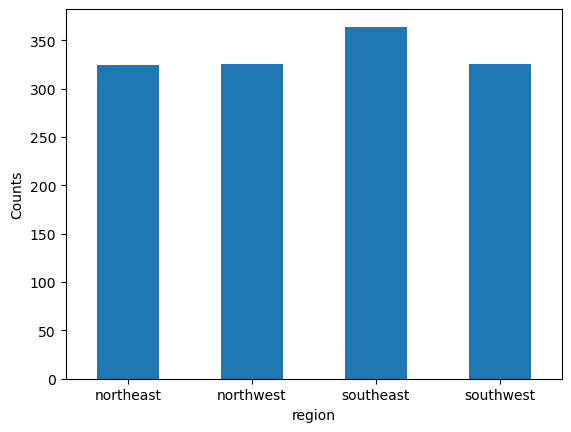

In [98]:
plot = AbsFreq_Region.plot.bar(rot=0, xlabel='region', ylabel ='Counts')

## Identification of outliers <a name="ci5"></a>
---

In [99]:
# FUNCIÓN PARA OBTENER OUTLIERS
def outliers (datos):
    df_iqr = stats.iqr(datos)
    print(f"Interquartile range: {df_iqr}")
    # Para localizar el primer y tercer cuartil.
    df_q1, df_q3 = np.quantile(datos, [0.25, 0.75])
 
    # Limites de los valores atípicos
    cut_low = df_q1 - 1.5 * df_iqr
    cut_high = df_q3 + 1.5 * df_iqr
 
    print("Lower and upper outlier limits:", cut_low, ", ", cut_high)
 
    # Obtenemos de nuestro dataset todos los valores atípicos segun los limites calculados
    df_outliers = data.loc[(datos < cut_low) | (datos > cut_high)]

    # Representación mediante boxpots (sección gráficos)

    print('We have a total of', len(df_outliers), 'outliers')

    return df_outliers

## AGE

In [100]:
# Outliers
age_outl = outliers(data.age)
age_outl

Interquartile range: 24.0
Lower and upper outlier limits: -9.0 ,  87.0
We have a total of 0 outliers


,age,sex,bmi,children,smoker,region,charges


## BMI

In [101]:
# Outliers
bmi_outl = outliers(data.bmi)
bmi_outl

Interquartile range: 8.3975
Lower and upper outlier limits: 13.7 ,  47.290000000000006
We have a total of 9 outliers


,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


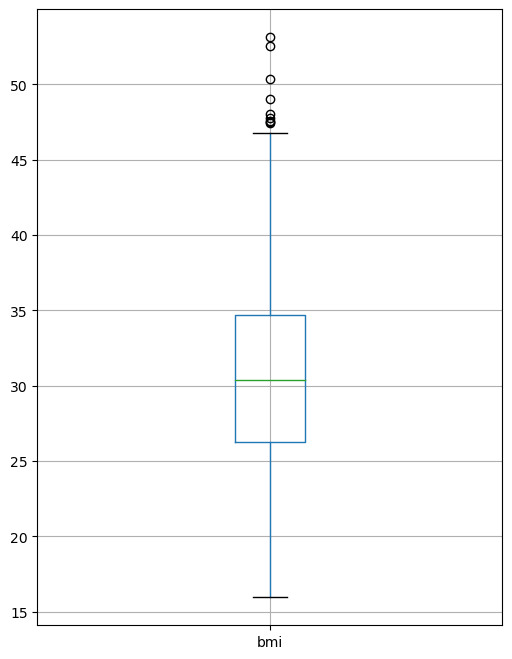

In [102]:
getPlot = data.boxplot(column='bmi', figsize=(6, 8))

+ There are 9 outliers in this variable, as we can see in the boxplot

## CHILDREN

In [103]:
# Outliers
children_outl = outliers(data.children)
children_outl

Interquartile range: 2.0
Lower and upper outlier limits: -3.0 ,  5.0
We have a total of 0 outliers


,age,sex,bmi,children,smoker,region,charges


## CHARGES

In [104]:
# Outliers
charges_outl = outliers(data.charges)
charges_outl

Interquartile range: 11899.625365
Lower and upper outlier limits: -13109.1508975 ,  34489.350562499996
We have a total of 139 outliers


,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


+ There are 139 outliers in this variable, as we can see in the boxplot

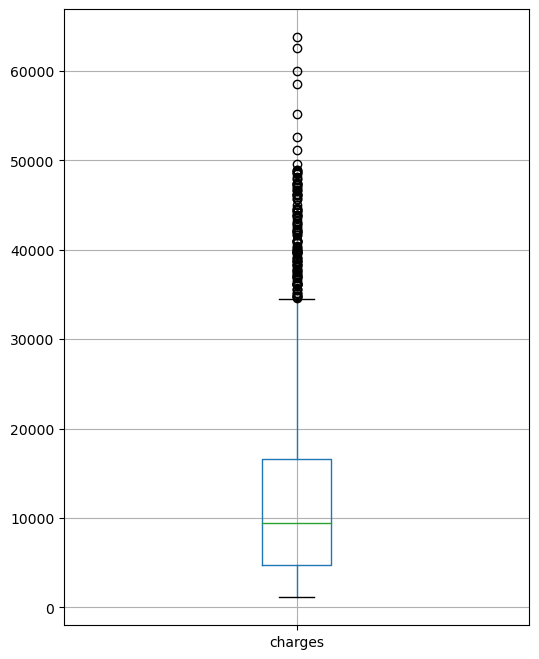

In [105]:
getPlot = data.boxplot(column='charges', figsize=(6, 8))